# 1、导入相关库

In [1]:
import cv2
import dlib
import time
import matplotlib.pyplot as plt

# 2、函数编写

### 2.1、函数：抽象出各个人脸检测器的检测功能（input：frame—>output：faces）

In [3]:
opencv_haarcascade_detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

def opencv_haarcascade(frame):
    faces = opencv_haarcascade_detector.detectMultiScale(frame)
    return faces

In [4]:
dlib_hog_detector = dlib.get_frontal_face_detector()

def dlib_hog(frame):
    faces = dlib_hog_detector(frame, 1)
    return faces

### 2.2、函数：测试人脸检测器性能

In [2]:
def test_detector_performance(video_path, detector_type):
    result = dict()
    result['fps'] = 0
    result['accuracy'] = 0

    fps_count = []
    frame_count = 0
    face_detected_frame_count = 0
    cap = cv2.VideoCapture(video_path)
    while True:
        ret, frame = cap.read()
        if ret:
            frame_count += 1
            start_time = time.time()
            faces = globals()[detector_type](frame)
            end_time = time.time()
            fps_count.append(1 / (end_time - start_time))
            if len(faces) > 0:
                face_detected_frame_count += 1
        else:
            result['accuracy'] = face_detected_frame_count / frame_count
            result['fps'] = sum(fps_count) / len(fps_count)
            return result

### 2.3、函数：结果可视化

In [5]:
def visualize(results, types):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # 绘制第一个子图 - "fps比较"
    ax1.bar(range(len(results['fps'])), results['fps'], color='blue')
    ax1.set_xticks(range(len(results['fps'])))
    ax1.set_xticklabels(types)
    ax1.set_ylabel("fps")
    ax1.set_title("FPS Compare")
    
    # 绘制第二个子图 - "准确率比较"
    ax2.bar(range(len(results['accuracy'])), results['accuracy'], color='green')
    ax2.set_xticks(range(len(results['accuracy'])))
    ax2.set_xticklabels(types)
    ax2.set_ylabel("accuracy")
    ax2.set_title("Accuracy Compare")
    
    # 调整子图之间的间距
    plt.tight_layout()

    # 展示图形
    plt.show()

### 2.4、函数：自动测试

In [6]:
def auto_test(video_path, detector_types):
    results = dict()
    results['fps']=[]
    results['accuracy']=[]
    
    used_type = []
    for type in detector_types:
        used_type.append(type)
        result = test_detector_performance("out.avi",type)
        results['fps'].append(result['fps'])
        results['accuracy'].append(result['accuracy'])
    print(results)
    
    visualize(results, used_type)

# 3、开始测试

{'fps': [33.59155445531904, 5.5922699057537315], 'accuracy': [1.0, 1.0]}


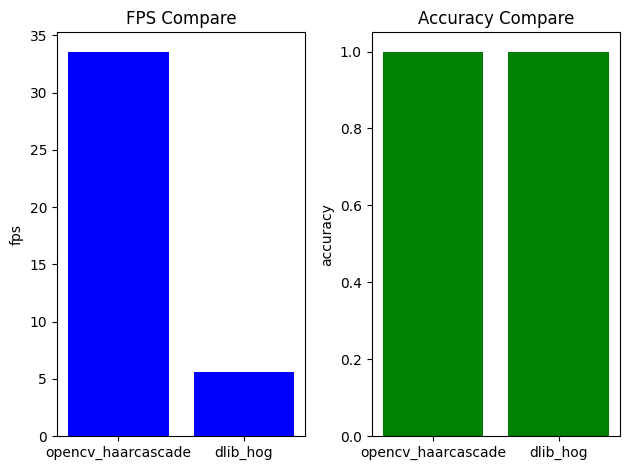

In [7]:
if __name__ == '__main__':
    video_path = "out.avi"
    detector_types = ["opencv_haarcascade", "dlib_hog"]
    auto_test(video_path,detector_types)